In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing

In [32]:
df = pd.read_csv('winner_ai.csv')
df.head(10)

,playerCard1,playerCard2,playerCard3,playerCard4,playerCard5,dealerCard1,dealerCard2,dealerCard3,dealerCard4,dealerCard5,playerHandSum,dealerHandSum,decision,cardsLeft,count,result
0,10,7,0,0,0,1,3,10,5,0,17,19,2,410,-1,Loss
1,11,2,0,0,0,10,3,10,0,0,13,23,2,405,-2,Win
2,7,10,0,0,0,4,10,5,0,0,17,19,2,400,-2,Loss
3,10,6,0,0,0,10,6,1,0,0,16,17,2,395,-3,Loss
4,6,7,0,0,0,10,3,8,0,0,13,21,2,390,-2,Loss
5,9,4,0,0,0,8,8,5,0,0,13,21,2,385,0,Loss
6,8,10,0,0,0,3,11,5,0,0,18,19,2,380,0,Loss
7,9,2,10,0,0,10,10,0,0,0,21,20,2,375,-2,Win
8,8,10,0,0,0,10,8,0,0,0,18,18,2,371,-4,Push
9,2,11,0,0,0,10,4,8,0,0,13,22,2,366,-4,Win


In [33]:
df['result'].describe()

count     100000
unique         3
top         Loss
freq       51906
Name: result, dtype: object

## Check For Null data

In [34]:
df.isnull().sum()

playerCard1      0
playerCard2      0
playerCard3      0
playerCard4      0
playerCard5      0
dealerCard1      0
dealerCard2      0
dealerCard3      0
dealerCard4      0
dealerCard5      0
playerHandSum    0
dealerHandSum    0
decision         0
cardsLeft        0
count            0
result           0
dtype: int64

## Create a couple new columns that we will need for analysis

In [44]:
df['playerStartHand'] = df['playerCard1']+df['playerCard2']
df['playerBust'] = df['playerHandSum'].apply(lambda x:1 if x > 21 else 0)
df['dealerBust'] = df['dealerHandSum'].apply(lambda x:1 if x > 21 else 0)
df['playerHit'] = df['playerCard3'].apply(lambda x:1 if x > 0 else 0)
df['binaryResult'] = df['result'].apply(lambda x: 0 if x == 'Loss' else 1)
df.head(2)

,playerCard1,playerCard2,playerCard3,playerCard4,playerCard5,dealerCard1,dealerCard2,dealerCard3,dealerCard4,dealerCard5,...,dealerHandSum,decision,cardsLeft,count,result,playerStartHand,playerBust,dealerBust,playerHit,binaryResult
0,10,7,0,0,0,1,3,10,5,0,...,19,2,410,-1,Loss,17,0,0,0,0
1,11,2,0,0,0,10,3,10,0,0,...,23,2,405,-2,Win,13,0,1,0,1


# Visualization

### Win loss percentages based on dealer shown card and player hand

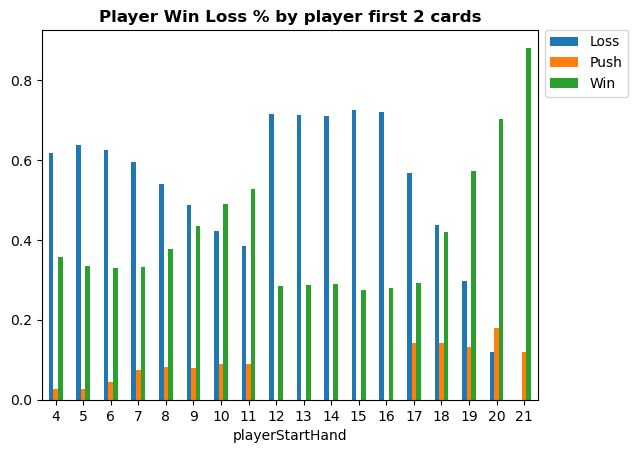

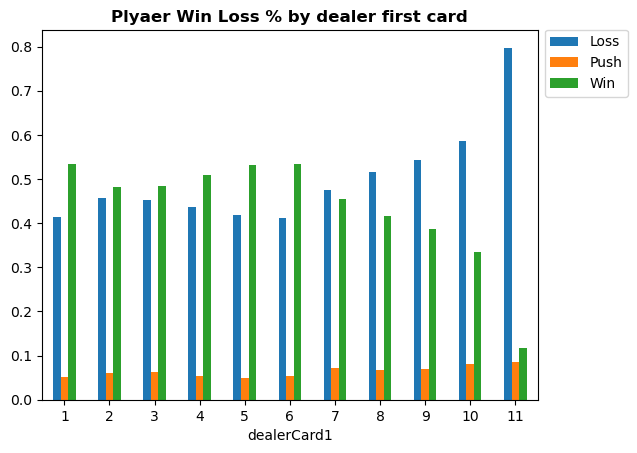

In [37]:
player_crosstab = pd.crosstab(df['playerStartHand'],df['result'],normalize=0)
player_barplot = player_crosstab.plot.bar(rot=0)
player_barplot.set_title('Player Win Loss % by player first 2 cards', weight='bold')
player_barplot.legend(bbox_to_anchor=(1,1.02),loc='upper left')

dealer_crosstab = pd.crosstab(df['dealerCard1'],df['result'],normalize=0)
dealer_barplot = dealer_crosstab.plot.bar(rot=0)
dealer_barplot.set_title('Plyaer Win Loss % by dealer first card', weight='bold')
dealer_barplot.legend(bbox_to_anchor=(1,1.02),loc='upper left')

### Bust percentages based on starting hand
Surprisingly enough the ai never busted

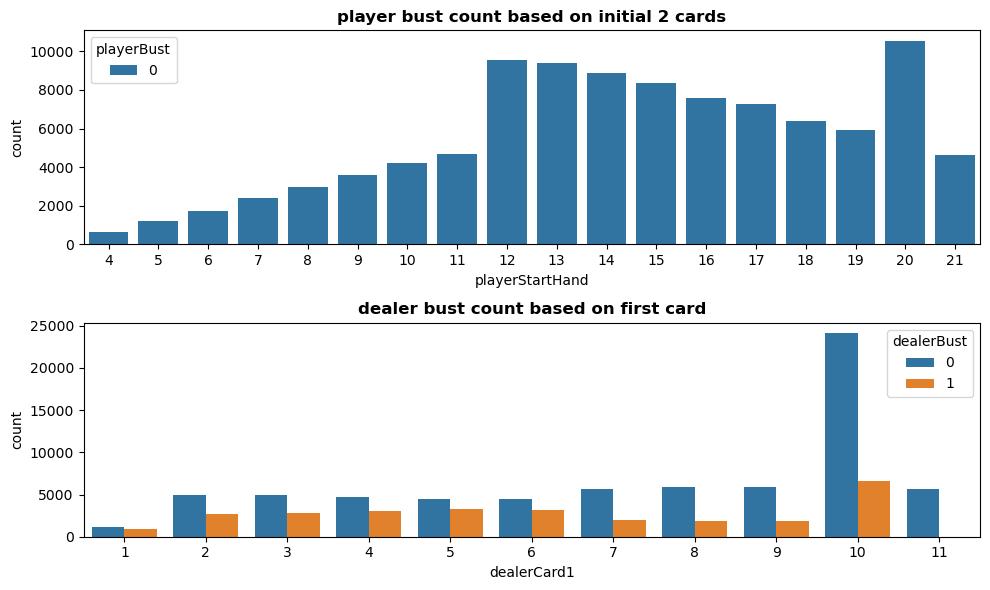

In [38]:
fix, ax = plt.subplots(2,1, figsize=(10,6))
sns.countplot(data=df,x='playerStartHand',hue='playerBust',ax=ax[0])
sns.countplot(data=df,x='dealerCard1',hue='dealerBust',ax=ax[1])
ax[0].set_title('player bust count based on initial 2 cards', weight='bold')
ax[1].set_title('dealer bust count based on first card',weight='bold')
plt.tight_layout()


### Dealer Bust percentages based on first card

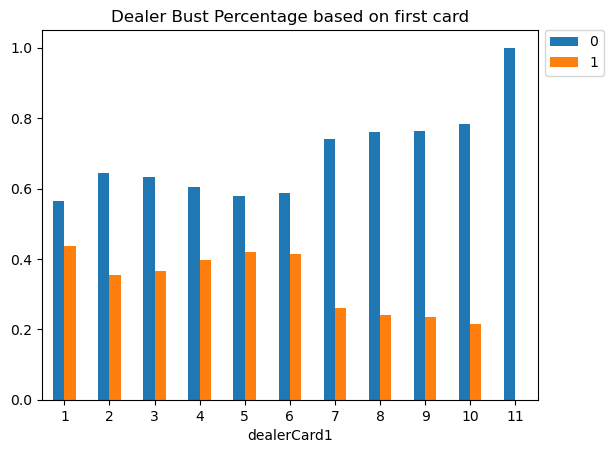

In [39]:
crosstab = pd.crosstab(df['dealerCard1'],df['dealerBust'],normalize=0)
barplot = crosstab.plot.bar(rot=0)
barplot.set_title('Dealer Bust Percentage based on first card')
barplot.legend(bbox_to_anchor=(1,1.02),loc='upper left')

### Heat map of player wins based on first 2 card sum and dealer first card

In [42]:
list(df.columns)

['playerCard1',
 'playerCard2',
 'playerCard3',
 'playerCard4',
 'playerCard5',
 'dealerCard1',
 'dealerCard2',
 'dealerCard3',
 'dealerCard4',
 'dealerCard5',
 'playerHandSum',
 'dealerHandSum',
 'decision',
 'cardsLeft',
 'count',
 'result',
 'playerStartHand',
 'playerBust',
 'dealerBust',
 'playerHit']

Text(120.72222222222221, 0.5, 'Dealer Card 1')

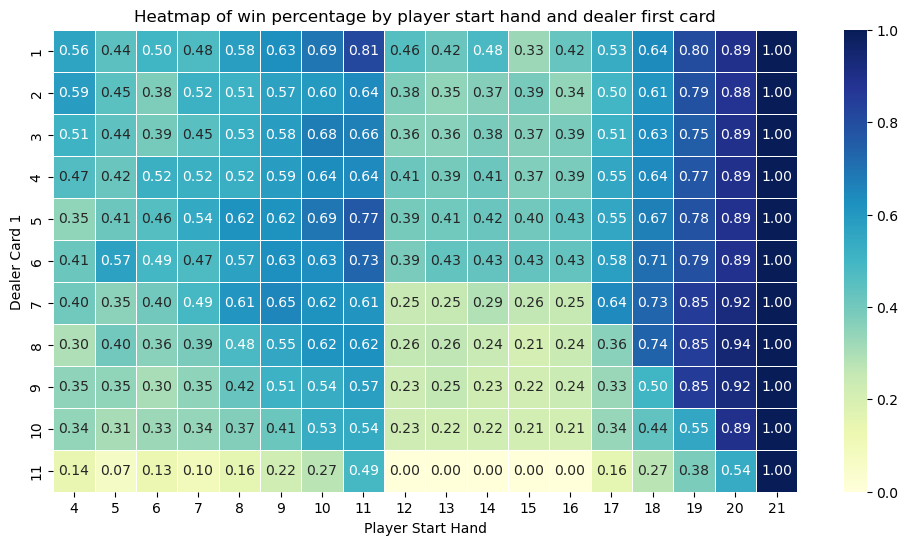

In [46]:
pivot_df = df.pivot_table(index='dealerCard1',columns='playerStartHand',values='binaryResult')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_df,annot=True,cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of win percentage by player start hand and dealer first card')
plt.xlabel('Player Start Hand')
plt.ylabel('Dealer Card 1')